# 8.2 Fixed Spanning Sets, Orthonormality, and Projections

- The fundamental principles of unsupervised learning all lie in some very rudimentary ideas from linear algebra combined with the cost-function based approach to learning we have seen previously with supervised methods. 


- This is because unsupervised learning is about effectively representing datasets with no output, i.e., *only input data*.


- Our goal with such data is simply to effectively represent it, and this is a task that has roots in the notion of a *spanning set of vectors* from basic linear algebra.

- In this Section we review the fundamental concepts from linear algebra surrounding the notion of a spanning set of vectors. 


- This includes: linear independence, learning proper weights for a fixed basis set representation, orthogonal bases and representation, and projections. 


- Reviewing these topics up front will allow us to much more effectively tackle and intuit unsupervised leaning techniques since they can be thought of as direct extensions.

You can toggle the code on and off in this presentation via the button below.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
import numpy as np

# custom libs
from mlrefined_libraries import unsupervised_library as unsuplib
from mlrefined_libraries import linear_algebra_library as linlib

datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'

# This is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

##  Perfectly representing data via a fixed spanning set

- Remember when thinking about data points in a multi-dimensional *vector space*, we can think of them simultaneously as 'dots' (as shown in the left panel) or as 'arrows' (as in the middle panel below). 


- When thinking about *spanning sets of vectors* it is often helpful to visualize points in the same space using both of these conventions - i.e., some as 'dots' and others as 'arrows' as shown in the right panel.  

  <img src= '../../mlrefined_images/unsupervised_images/vector_dot_perspective.png' width="110%"  height="auto" alt=""/>



- Those vectors drawn as arrows are particular points - often called a *basis* or *spanning set of vectors* - over which we aim to efficiently represent every other point in the space.  


- Those other vectors shown as dots are those points we wish to represent over our basis / spanning set.

- Lets suppose our set of input points - our *dataset* - is written as  \{$\mathbf{x}_1,\,\mathbf{x}_2,\,...,\mathbf{x}_P\}$ and lives in $N$ dimensions (that is, each point is $N$ dimensional). 


- Moreover throughout we will assume that our dataset has been *mean-centered* - a simple and completely reversible operation that involves subtracting off the mean of the dataset along each input dimension - so that it straddles the origin.


- This sort of normalization is almost always done in practice, and is computationally inexpensive to execute. 

- In order for our basis / spanning set to be capable of perfectly representing all $P$ of our points it too must live in the same $N$ dimensional space.  


- For a candidate basis / spanning set $\mathbf{c}_1,\,\mathbf{c}_2,...,\mathbf{c}_N$ to be capable of perfectly representing such generic $N$ dimensional (input) data means...


- ...that for each data point a set of weights exists so that, in particular linear combination, our basis set can match each data point as

\begin{equation}
\sum_{n=1}^N \mathbf{c}_n w_{n,\,p} = \mathbf{x}_p  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P.
\end{equation}

- Technically speaking in order for this possibility to exist our spanning set must be *linearly independent* 


- that is, the spanning vectors do not 'overlap', they point in completely different directions in the space.

- As the simplest example imagine our spanning set was the set of $N$ *standard basis vectors*. The $n^{th}$ element of a standard basis takes the form of vectors that consist entirely of zeros, except for a $1$ in its $n^{th}$ slot

\begin{equation}
\text{($n^{th}$ element of the standard basis)}\,\,\,\,\,\,\,\, \mathbf{c}_n = 
\begin{bmatrix}
0 \\ 
\vdots \\
0 \\
1 \\
0 \\
\vdots \\
0
\end{bmatrix}.
\end{equation}

- To represent a data point $\mathbf{x}_p$ over the standard basis is a trivial affair, and one can easily check that the perfect weights must be defined as

\begin{equation}
w_{n,\,p} = x_{n,\,p}
\end{equation}

- i.e., each weight is simply equal to the value of the data point we aim to represent.  


- For most any other spanning set however these weights must be solved for numerically, which we frame in terms of a cost function minimization after the examples below.

- If indeed the spanning set of vectors is linearly independent, then having properly tuned the weights of point $\mathbf{x}_p$, denoted as the $N$ length vector

\begin{equation}
 \mathbf{w}_p = \begin{bmatrix}  w_{1,\,p} \\ w_{2,\,p} \\ \vdots \\ w_{N,\,p} \end{bmatrix}
 \end{equation}


- This weight set provides the new representation of $\mathbf{x}_p$ with respect to the spanning set. 


- For example, in the trivial case where our spanning set consists of the standard basis our representation or feature vector $\mathbf{w}_p = \mathbf{x}_p$ is the data point itself!  


- Otherwise $\mathbf{w}_p$ - typically referred to as the new **encoding** of $\mathbf{x}_p$* in the *transformed feature space* whose coordinate axes are defined by the spanning set - is a vector that differs from original data point. 

<figure>
  <img src= '../../mlrefined_images/unsupervised_images/feature_space_rep.png' width="110%"  height="auto" alt=""/>
  <figcaption>  <em> (left) A 2-d point, $\mathbf{x}_1$, shown in the space spanned by vectors $\mathbf{c}_1$ and $\mathbf{c}_2$. (right) Representation, also known as the *encoding*, of $\mathbf{x}_1$ in the transformed feature space. </em>  </figcaption> 
</figure>

#### <span style="color:#a50e3e;">Example. </span>  Perfect representation with complete spanning set in $N=2$ dimensions

- Lets examine an example of a spanning set of vectors in $N=2$ dimensions. 


- Below we run an animation showing how the set of two spanning vectors

\begin{equation}
\mathbf{c}_1 = 
\begin{bmatrix}
2 \\ 
1
\end{bmatrix}  
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\mathbf{c}_2 = 
\begin{bmatrix}
1\\
2
\end{bmatrix}.
\end{equation}

- Because these two vectors are *linearly independent*.


- That is they do not overlap completely and point in different directions in the space, we can perfectly represent any point in the space using some linear combination of them as 

\begin{equation}
w_{1,\,p}\mathbf{c}_1 + w_{2,\,p}\mathbf{c}_2 = \mathbf{x}_p
\end{equation}


- Here the weights $w_{1,\,p}$ and $w_{2,\,p}$ are unique to each point $\mathbf{x}_p$.  

- Once properly tuned the weight vector $\mathbf{w}_p = \begin{bmatrix} w_{1,\,p} \\ w_{2,\,p} \end{bmatrix} $ provides us with a new representation or encoding of $\mathbf{x}_p$ in the transformed feature space whose coordinates are precisely our spanning set.


- In the animation below we range show two panels - the original space in the left, and the transformed feature space in the right defined by the above spanning set.  


- In each panel the two spanning set vectors $\mathbf{c}_1$ and $\mathbf{c}_2$ are shown as solid black arrows, and points $\mathbf{x}_p$ (taken over a course range of the input space here) are shown as black dots.  

- Each point $\mathbf{x}_p$ is shown simultaneously in the original and transformed feature space, where the point is *encoded* by its weight vector $\mathbf{w}_p$.  


- In each space the appropriate linear combination of the two spanning vectors required to represent the point is shown as a red arrow, and each scaled spanning vector is shown as a blue arrow. 


- As the slider is pushed from left to right additional points additional points are shown represented over the spanning set / encoded points in the transformed feature space.

In [5]:
# This code cell will not be shown in the HTML version of this notebook
# animate a two-dimensional spanning set ranging over a coarse set of points in the space
C = np.array([[2,1],[1,2]])
savepath = 'videos/animation_1.mp4'
unsuplib.span_animation.perfect_visualize_transform(savepath,C,num_frames = 200,fps=10)

In [4]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_1.mp4" type="video/mp4">
  </video>
""")

- Below we show how this spanning set transforms a prototypical dataset of 50 data points. 

<IPython.core.display.Javascript object>


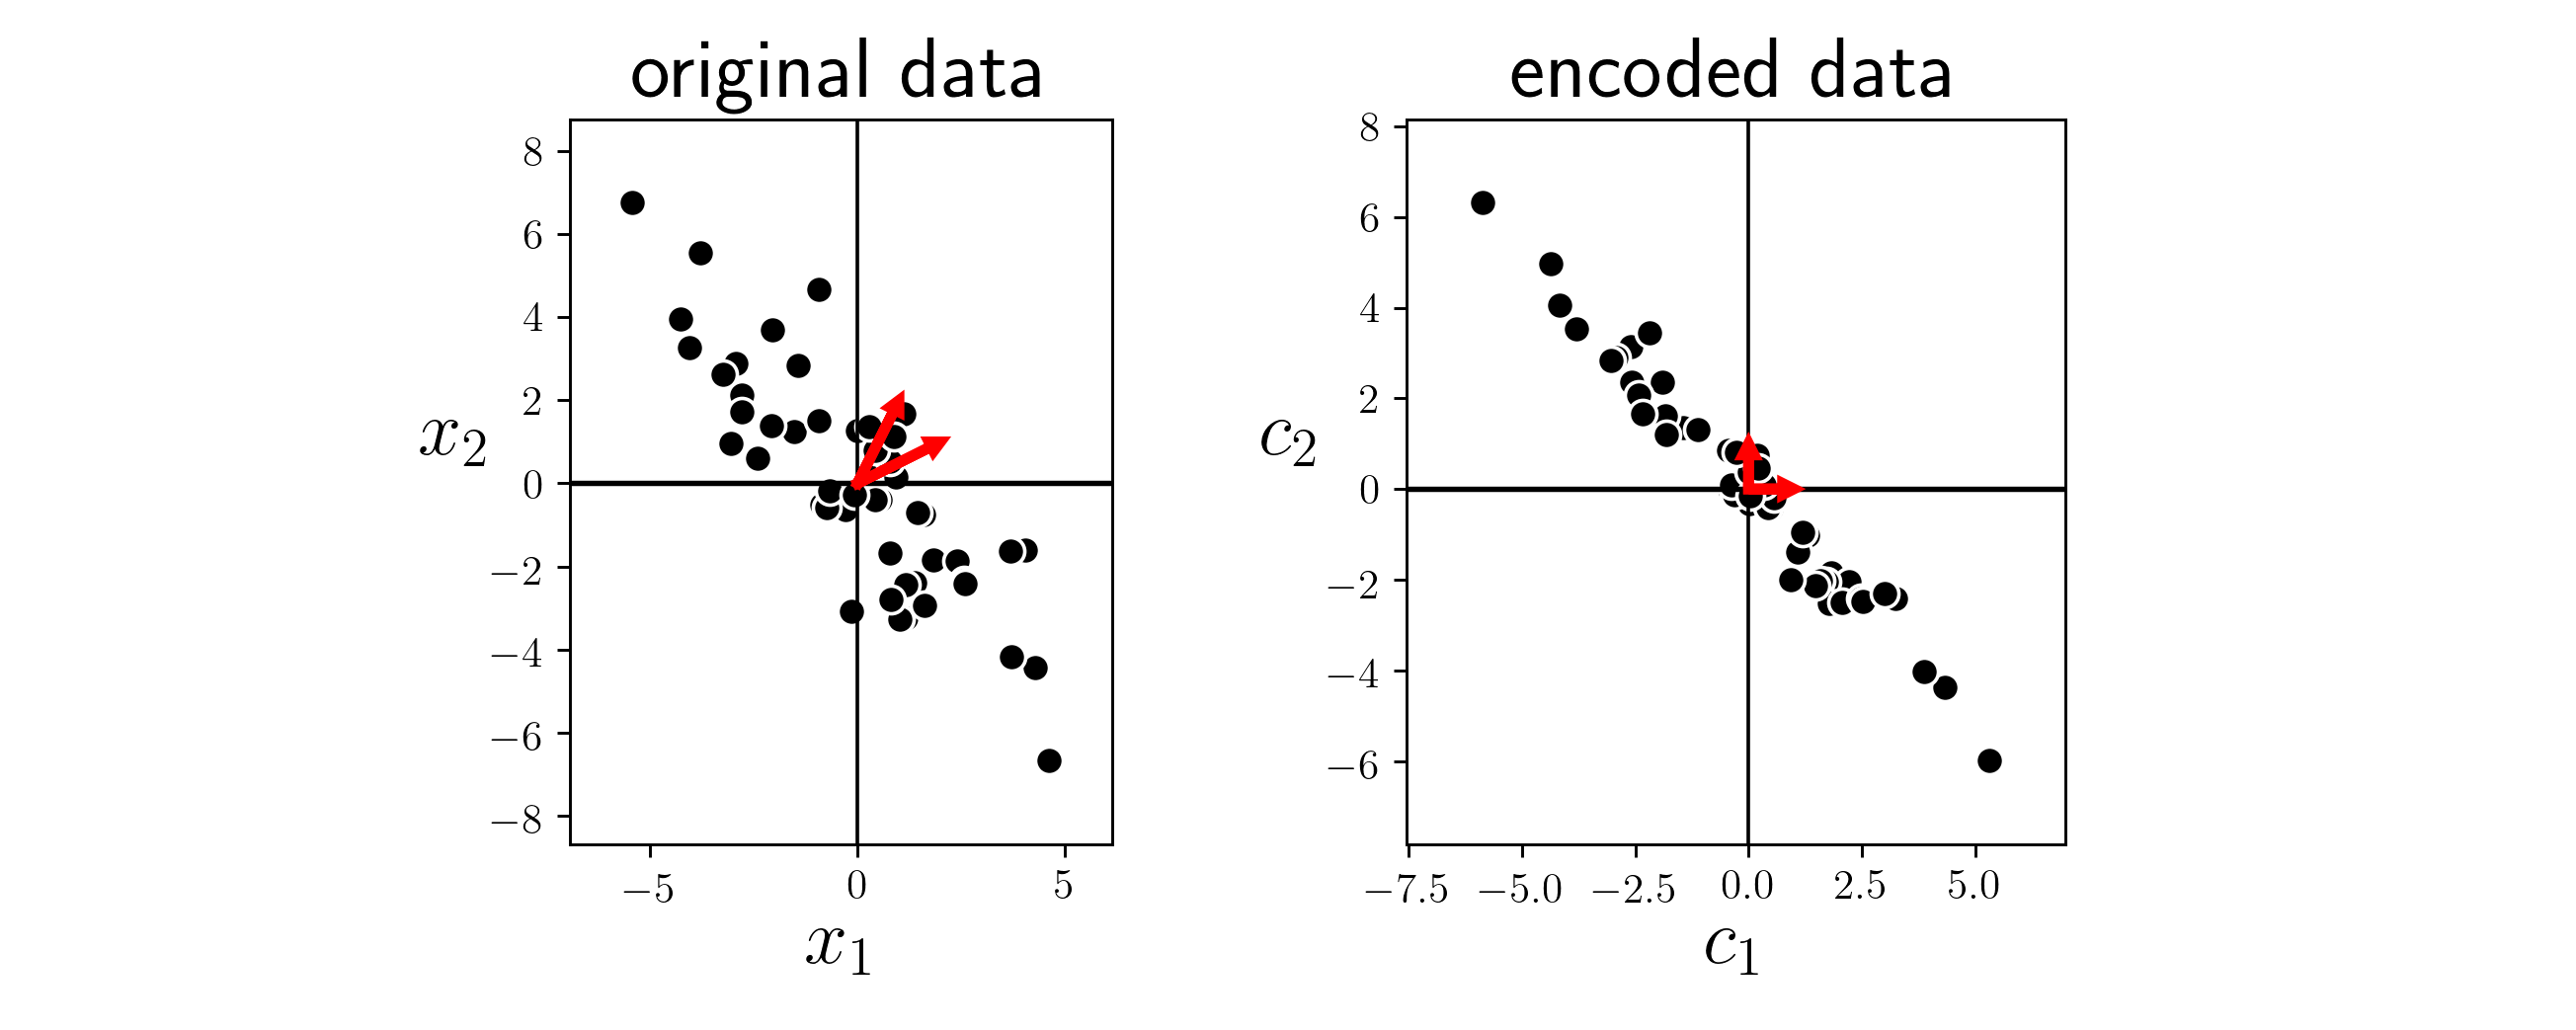

In [3]:
# This code cell will not be shown in the HTML version of this notebook
def center(X):
    '''
    A function for normalizing each feaure dimension of an input array, mean-centering
    and division by its standard deviation
    
    '''
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_normalized = X - X_means

    return X_normalized

# load in dataset to perform PCA on
X_original = np.loadtxt(datapath + '2d_span_data.csv',delimiter=',')

# center data
X = center(X_original)

# plot data and spanning set, and tranformed version
C = np.array([[2,1],[1,2]])
unsuplib.span_animation.perfect_visualize_transform_static(C,X=X)

- One way we can solve for the proper weights is by setting up / minimizing an appropriate cost function.  


- It is natural (as in our development of e.g., linear regression) to square the difference between both sides of equation (1) as $\left(\sum_{n=1}^N \mathbf{c}_n w_{p,n} - \mathbf{x}_p\right)^2$ 


- We then tune the corresponding weights to make this squared error as small as possible. 



- So for each data point $\mathbf{x}_p$ we have a cost function 

\begin{equation}
g\left(w_{1,\,p},...,w_{N,\,p}\right) = \left(\sum_{n=1}^N \mathbf{c}_n w_{n,\,p} - \mathbf{x}_p\right)^2  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P
\end{equation}


- When minimized appropriately provides us with a proper set of parameters for representing $\mathbf{x}_p$ over the spanning set. 


- While we could certainly use an iterative method like gradient descent to minimize this single-point cost, here we can in fact directly setup and solve the [first order system](https://jermwatt.github.io/mlrefined/blog_posts/Computational_Calculus/Part_13_unconstrained_optimality_conditions.html) of equations.


- It isperhaps easiest to see this by writing the above cost function more compactly as

\begin{equation}
h\left(\mathbf{w}_p\right) = \left \Vert \mathbf{C}\mathbf{w}_p - \mathbf{x}_p \right\Vert_2^2.
\end{equation}


- Here the $N\times N$ matrix $\mathbf{C}$ is formed by stacking the spanning set vectors column-wise, and the $N\times 1$ vectors $\mathbf{w}_p$ as 

\begin{equation}
\mathbf{C} = 
\begin{bmatrix}
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert \\
\mathbf{c}_1 \,\,\, \mathbf{c}_2 \,\,\,\,\,\, \mathbf{c}_N \\
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert 
\end{bmatrix}
\,\,\,\,\,\,\,\,\,\,\, 
\mathbf{w}_p = 
\begin{bmatrix}
 w_{p,1} \\
 w_{p,2} \\
 \vdots  \\
 w_{p,N}
\end{bmatrix}
\end{equation}

- Now setting the gradient of the cost function to zero and solving for $\mathbf{w}_p$ gives the linear symmetric system of equations for each $\mathbf{w}_p$


- which we can conveniently write algebraically as 

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,}\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P.
\end{equation}

- Numerically this sort of symmetric system of equations can be solved via e.g., coordinate descent. 


- Once these are solved for - and we have our learned weights $\hat{\mathbf{w}}_p$ -  we can then perfectly represent a point $\mathbf{x}_p$ over the spanning set as we desired in equation (1) as 

\begin{equation}
\mathbf{C}\hat{\mathbf{w}}_p  = \sum_{n=1}^N \mathbf{c}_n \hat{w}_{n,\,p} = \mathbf{x}_p.
\end{equation}

- Notice here that we can take the average of the individual single-point cost functions in equation (4) / (5), giving a cost function over the entire dataset

\begin{equation}
g\left(\mathbf{w}_1,...,\mathbf{w}_P\right) = \frac{1}{P}\sum_{p = 1}^P \left \Vert \mathbf{C}\mathbf{w}_p - \mathbf{x}_p \right\Vert_2^2.
\end{equation}

- This is just a convenient way of writing out the entire list of $P$ single-point cost functions together


- i.e., we get no new solution methods by doing this, as the joint cost decomposes over the weight vectors $\mathbf{w}_p$.  



- Formally then our optimization problem to recover all of the proper weight vectors can be expressed as

\begin{equation}
\underset{\mathbf{w}_1,\mathbf{w}_2,...,\mathbf{w}_P}{\text{minimize}} \,\, \frac{1}{P}\sum_{p = 1}^P \left \Vert \mathbf{C}\mathbf{w}_p - \mathbf{x}_p \right\Vert_2^2.
\end{equation}

##  Perfect representation using a fixed orthonormal spanning set

- A very special kind of basis / spanning set one often sees when representing data points is one whose elements are *perpendicular* and *unit length*.  


- Such a spanning set $\mathbf{c}_1,\,\mathbf{c}_2,\,...\,\mathbf{c}_N$ is one that spans an entire space, but whose elements are perpendicular have length one. 


- Algebraically this is written as 

\begin{array}
\
\mathbf{c}_n^T\mathbf{c}_m^{\,} = 0 \\
\left \Vert \mathbf{c}_n \right \Vert_2^2 = 1 \,\,\,\,\text{for}\,\,n=1...N.
\end{array}

- Note that the same constraints expressed in terms of the concatenated basis matrix $\mathbf{C}$ can be written compactly as 

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,} = \mathbf{I}_{N\times N}.
\end{equation}

- Often such a spanning sets are likewise referred to as *orthonormal* or - sometimes - *orthogonal*


- Technically speaking the latter term should only be applied when a set of vectors consists of perpendicular elements that are not necessarily unit-length, it is unfortunately often used to refer to unit-length perpendicular vectors as well.  

#### <span style="color:#a50e3e;">Example. </span>  Standard basis

- The *standard basis* discussed above the most common example of an *orthogonal* basis - one whose elements are perpendicular and are unit-length.  


- In the next cell we show a fine range of linear combinations of the standard basis in $N=2$ dimensions.  


- As with any spanning set / basis, linear combinations of these two vectors can perfectly represent any point in the space.

In [7]:
# This code cell will not be shown in the HTML version of this notebook
# animate a two-dimensional spanning set ranging over a coarse set of points in the space
C = np.array([[1,0],[0,1]])
savepath = 'videos/animation_2.mp4'
linlib.span_animation.perfect_visualize(savepath,C,num_frames = 200,fps=10)

In [8]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_2.mp4" type="video/mp4">
  </video>
""")

- Lets express the particular weights over which a dataset of $P$ points is represented over an orthonormal basis.


- Thus the "system of equations" providing the ideal weight vector or *encoding* $\mathbf{w}_p$ for each data point $\mathbf{x}_p$ over an orthonormal basis of vectors is given simply by 

\begin{equation}
\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p      \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P.
\end{equation} 

- In other words, if a basis / spanning set is orthonormal there is no system of equations left to solve for - we get the solution / encoded version $\mathbf{w}_p$ of each point $\mathbf{x}_p$ directly as a simple inner product of the spanning set against each data point!  


- Practically speaking this means that computing the weight vector or encoding $\mathbf{w}_p$ of a point $\mathbf{x}_p$ is considerably cheaper if our spanning set is orthonormal.


- Note further how here how we can - with these ideal weights solved for - express our data representation over an orthonormal spanning set in equation (1) very nicely in vector / matrix notation as

\begin{equation}
\mathbf{C}\,\mathbf{C}^T\mathbf{x}_p = \mathbf{x}_p  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P.
\end{equation}


- So in short, when the spanning set is orthonormal the entire set of encodings of a dataset can be expressed strictly in terms of the spanning set and the data itself.

##  Imperfectly representing data using a fixed spanning set

- Above we reviewed two important facts that we require for a spanning set / basis in order for it to be capable of perfectly representing points in a generic $N$ dimensional space:


-  The set of vectors are *linearly independent*, that is they point in different directions in the space


- There are at least $N$ spanning vectors

- What happens when we relax the second condition and suppose we more generally have $K\leq N$ spanning vectors / basis elements?  


- Unsurprisingly we can no longer perfectly represent a generic set of $P$ points in the space. 


- In $N$ dimensions this set of $K$ vectors can - at best - span a $K$ dimensional subspace.  

- For example as illustrated in the figure below, if $N=3$ the best any set of $K=2$ spanning vectors can do is span a hyperplane.  


- A set consisting of a single $K = 1$ spanning vector can only span a line.  


- In both instances we clearly will not be able to perfectly represent all possible points in a space, since our reach in each case is restricted to a lower dimensional *subspace* of the full space. 

<figure>
  <img src= '../../mlrefined_images/unsupervised_images/PCA_proj.png' width="120%"  height="auto" alt=""/>
  <figcaption>   <em> (left top) An example of data in $N = 2$ dimensions projected onto a $K=1$ dimensional subspace. (right top) An example of data projected in $N = 3$ dimensional space projected onto a $K=2$ dimensional subspace.  </em>  </figcaption> 
</figure>

- While we may not be able to perfectly represent a given point or set of points in the space, we can try our best.  


- Mirroring the setup we saw above with a complete basis, the same logic then leads us to the Least Squares cost function (a generalization of equation (4) above) for each data point

\begin{equation}
g\left(w_{1,\,p},...w_{K,\,p}\right) = \left(\sum_{n=1}^K \mathbf{c}_n w_{n,\,p} - \mathbf{x}_p\right)^2   \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P
\end{equation}

- here the only difference from the original cost function is that we now only have $K$ spanning set vectors.  

- Likewise we can derive the similar looking *first order system* of symmetric equations providing our ideal weights or encoding vectors $\mathbf{w}_p$, writing them neatly using the compact vector / matrix notation established previously as

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,}\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P.
\end{equation}

- Here there is of course only one caveat: since we have only $K$ spanning set vectors the matrix $\mathbf{C}$ is $N\times K$, consisting of only our $K$ spanning vectors lined up column-wise 
$\mathbf{C} = 
\begin{bmatrix}
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert \\
\mathbf{c}_1 \,\,\, \mathbf{c}_2 \,\,\,\,\,\, \mathbf{c}_K \\
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert
\end{bmatrix}$.

- Note how once the weight vectors / encodings $\mathbf{w}_p$ are computed the *projection* of $\mathbf{x}_p$ 


- i.e., its representation over the subspace spanned by $\mathbf{C}$ - is given by the formula $\mathbf{C}\mathbf{w}_p$.  

- This is called the *projection* because the representation is given by 'dropping' $\mathbf{x}_p$ perpendicularly onto the span of the hyperplane made by the span of the $K$ basis elements.


- In line with the same sort of 'coding' language often used to describe the weight vector $\mathbf{w}_p$ as the *encoding* of a point $\mathbf{x}_p$ in the (sub)space spanned by $K$ spanning vectors $\mathbf{c_1},\,\mathbf{c}_2,...,\mathbf{c}_K$


- Which as we have seen (and as visualized in the figure above) - the *projection* of each point onto the subspace spanned by these $K$ vectors is often referred to as the *decoding* of the original data point. 

<figure>
  <img src= '../../mlrefined_images/unsupervised_images/feature_space.png' width="85%"  height="auto" alt=""/>
  <figcaption>    <em> 
</em>  </figcaption> 
</figure>

## Imperfect representation using a fixed orthonormal spanning set

<figure>
  <img src= '../../mlrefined_images/unsupervised_images/autoencoder_geometry.png' width="95%" height="auto" alt=""/>
  <figcaption>   
<em> 
The geometry of projecting a point $\mathbf{x}_p$ onto a basis of orthogonal vectors, shown when using $K = 1$ vectors in the left panel and $K = 2$ in the right.

</em>  </figcaption> 
</figure>

- If our spanning set / basis of $K$ elements is orthonormal the above formula for each weight vector encoding $\mathbf{w}_p$ once again reduces algebraically to 

\begin{equation}
\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p      \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P
\end{equation} 

- since we will have 

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,} = \mathbf{I}_{K\times K}.
\end{equation}

- Our representation is likewise given simply in terms of the incomplete spanning set and datapoints as

\begin{equation}
\mathbf{C}^{\,}\mathbf{C}^T\mathbf{x}_p \approx \mathbf{x}_p  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P.
\end{equation}


- These formula are absolutely critical since - as will see beginning in the very next Section... 


- ...when we next aim to *learn* the best basis for a given set of data the assumption of orthogonality simplifies this learning process significantly.